# Deep Learning Approach

## Imports

In [1]:
from sklearn.model_selection import train_test_split

from src.utils import load_config
from main import run_preprocessing_pipeline
from src.models import BinaryNeuralNetworkModel, MultilabelNeuralNetworkModel, MulticlassNeuralNetworkModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Binary Classification

In [ ]:
config = load_config("deep-learning/dl-binary")

X, y = run_preprocessing_pipeline(config)
y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = BinaryNeuralNetworkModel(X_train.shape[1])

In [ ]:
model.fit(X_train, y_train, 0.001, 5, 16)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
evaluate_model(model, X_test, y_test)

In [ ]:
model.save("data/models/dl-binary.pt")

## Multilabel Classification

In [ ]:
config = load_config("deep-learning/dl-multilabel")

X, y = run_preprocessing_pipeline(config)
columns = ["advert", "coi", "fanpov", "pr", "resume"]
y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultilabelNeuralNetworkModel(X_train.shape[1])

In [ ]:
model.fit(X_train, y_train, learning_rate=0.001, num_epochs=5, batch_size=16)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
evaluate_model(model, X_test, y_test)

In [ ]:
model.save("data/models/dl-multilabel.pt")

## Augmented Classification

In [ ]:
config = load_config("deep-learning/dl-augmented")

X, y = run_preprocessing_pipeline(config)

columns = ["advert", "coi", "fanpov", "pr", "resume"]
y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultilabelNeuralNetworkModel(X_train.shape[1])

In [ ]:
model.fit(X_train, y_train, learning_rate=0.001, num_epochs=5, batch_size=16)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
evaluate_model(model, X_test, y_test)

## Wikipedia-Dump

In [2]:
config = load_config("deep-learning/dl-wp-binary")

X, y = run_preprocessing_pipeline(config)

y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-15 14:00:33,113 - src.utils - INFO - Loading config from configs/deep-learning/dl-wp-binary.yaml.
2025-03-15 14:00:33,120 - src.data_loader - INFO - Loading data with {'good_file': 'data/wp/good_sample.csv', 'promo_file': 'data/wp/promotional_sample.csv', 'neutral_file': 'data/wp/neutral_sample.csv', 'shuffle': False, 'save': 'loaded_data_wp_binary.csv'}
2025-03-15 14:00:33,121 - src.data_loader - INFO - Loading non-promotional and promotional data for binary classification.
2025-03-15 14:01:40,791 - src.utils - INFO - Data saved to data/intermediary/loaded_data_wp_binary.csv.
2025-03-15 14:01:40,794 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_wp_binary.csv'}
2025-03-15 14:01:40,794 - src.preprocessing - INFO - Removing non-word characters.
2025-03-15 14:03:45,694 - src.preprocessing - INFO

In [5]:
model = MulticlassNeuralNetworkModel(X_train.shape[1])

In [6]:
model.fit(X_train, y_train, 0.001, 5, 16)

Epoch 1/5, Loss: 0.3152
Epoch 2/5, Loss: 0.2102
Epoch 3/5, Loss: 0.1554
Epoch 4/5, Loss: 0.1030
Epoch 5/5, Loss: 0.0624


In [7]:
predictions = model.predict(X_test)

2025-03-15 15:42:31,741 - src.evaluation - INFO - Evaluating the model.
2025-03-15 15:42:35,525 - src.evaluation - INFO - Accuracy: 88.48%
2025-03-15 15:42:35,573 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5942
           1       0.89      0.85      0.87      6060
           2       0.84      0.85      0.84      5998

    accuracy                           0.88     18000
   macro avg       0.88      0.89      0.88     18000
weighted avg       0.88      0.88      0.88     18000

2025-03-15 15:42:35,584 - src.evaluation - INFO - Confusion Matrix:
[[5695   43  204]
 [ 111 5154  795]
 [ 321  600 5077]]
2025-03-15 15:42:35,735 - src.evaluation - INFO - Evaluation finished.


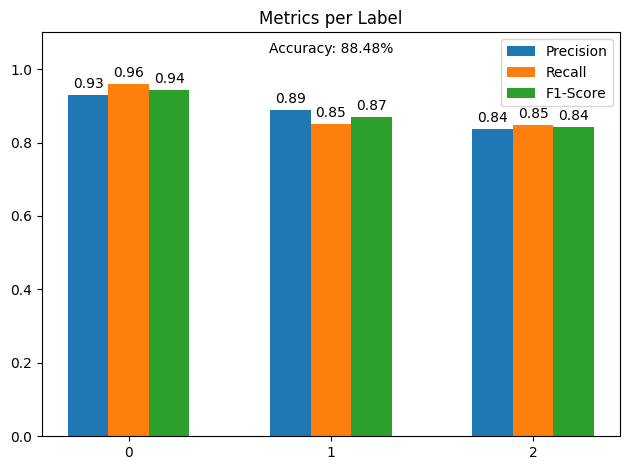

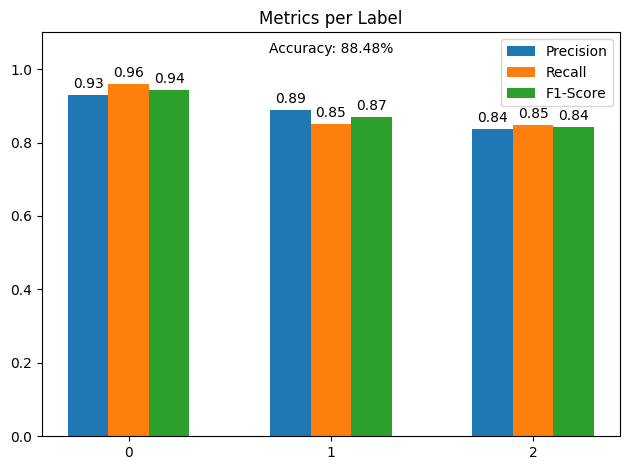

In [8]:
evaluate_model(model, X_test, y_test)

In [9]:
model.save("data/models/dl-wp-binary.pt")